Load data and create a subset (1% of full dataset)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import pandas as pd

rec_log_df = pd.read_csv('data/instafreebie2-21-17_recommend_log.csv')
books_df = pd.read_csv('data/instafreebie2-21-17_books.csv')

In [3]:
rec_log_subset = rec_log_df.iloc[-295918:]
genres_df = pd.read_csv('data/instafreebie2-21-17_genres.csv')

EDA

In [4]:
print 'rec_log_df shape:', rec_log_df.shape
print 'rec_log_subset shape:', rec_log_subset.shape
print 'books_df shape:', books_df.shape
print 'genres_df shape:', genres_df.shape

rec_log_df shape: (29591800, 12)
rec_log_subset shape: (295918, 12)
books_df shape: (27063, 22)
genres_df shape: (32, 4)


In [5]:
print "Columns:"
for col in rec_log_df.columns:
    print col

Columns:
id
source
reader_id
from_book_id
book_id
ad_id
boost_id
clicked
claimed
optin
created_at
updated_at


In [6]:
print "books_df Columns:"
for col in books_df.columns:
    print col

books_df Columns:
id
title
description
preview
asin
genre_id
genre_id_2
genre_id_3
user_id
pen_name_id
discover
created_at
updated_at
deleted_at
drm
epub
mobi
pdf
epub_error
epub_processing
blog_featured
homepage_featured


In [7]:
print "genres_df Columns:"
for col in genres_df.columns:
    print col

genres_df Columns:
id
genre
created_at
updated_at


In [8]:
rec_log_df.head()

,id,source,reader_id,from_book_id,book_id,ad_id,boost_id,clicked,claimed,optin,created_at,updated_at
0,1,success_page,94918,4584,4666,0,0,0,0,0,2015-10-21 18:13:33,2015-10-21 18:13:33
1,2,success_page,94918,4584,4192,0,0,0,0,0,2015-10-21 18:13:33,2015-10-21 18:13:33
2,3,success_page,94918,4584,4395,0,0,0,0,0,2015-10-21 18:13:33,2015-10-21 18:13:33
3,4,success_page,24635,4757,3441,0,0,0,0,0,2015-10-21 18:14:31,2015-10-21 18:14:31
4,5,success_page,24635,4757,4395,0,0,0,0,0,2015-10-21 18:14:31,2015-10-21 18:14:31


In [9]:
rec_log_subset.head()

,id,source,reader_id,from_book_id,book_id,ad_id,boost_id,clicked,claimed,optin,created_at,updated_at
29295882,29295919,success_page,186643,20370,19203,0,0,1,1,0,2017-02-20 02:16:11,2017-02-20 02:26:24
29295883,29295920,success_page,186643,20370,19813,0,0,0,0,0,2017-02-20 02:16:11,2017-02-20 02:16:11
29295884,29295921,success_page,523754,18777,16281,0,0,0,0,0,2017-02-20 02:16:12,2017-02-20 02:16:12
29295885,29295922,success_page,523754,18777,22669,0,0,1,1,0,2017-02-20 02:16:12,2017-02-20 02:16:37
29295886,29295923,success_page,523754,18777,25350,0,0,0,0,0,2017-02-20 02:16:12,2017-02-20 02:16:12


In [10]:
rec_log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29591800 entries, 0 to 29591799
Data columns (total 12 columns):
id              int64
source          object
reader_id       int64
from_book_id    int64
book_id         int64
ad_id           int64
boost_id        int64
clicked         int64
claimed         int64
optin           int64
created_at      object
updated_at      object
dtypes: int64(9), object(3)
memory usage: 2.6+ GB


In [11]:
rec_log_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295918 entries, 29295882 to 29591799
Data columns (total 12 columns):
id              295918 non-null int64
source          295918 non-null object
reader_id       295918 non-null int64
from_book_id    295918 non-null int64
book_id         295918 non-null int64
ad_id           295918 non-null int64
boost_id        295918 non-null int64
clicked         295918 non-null int64
claimed         295918 non-null int64
optin           295918 non-null int64
created_at      295918 non-null object
updated_at      295918 non-null object
dtypes: int64(9), object(3)
memory usage: 27.1+ MB


In [12]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27063 entries, 0 to 27062
Data columns (total 22 columns):
id                   27063 non-null int64
title                27063 non-null object
description          10007 non-null object
preview              27063 non-null int64
asin                 4167 non-null object
genre_id             22989 non-null float64
genre_id_2           13871 non-null float64
genre_id_3           8477 non-null float64
user_id              27063 non-null int64
pen_name_id          27063 non-null int64
discover             27063 non-null int64
created_at           27063 non-null object
updated_at           27063 non-null object
deleted_at           4335 non-null object
drm                  27063 non-null int64
epub                 27063 non-null int64
mobi                 27063 non-null int64
pdf                  27063 non-null int64
epub_error           27063 non-null int64
epub_processing      27063 non-null int64
blog_featured        27063 non-null int64


In [13]:
df_clicked = rec_log_df.clicked.sum()
df_claimed = rec_log_df.claimed.sum()
df_optin = rec_log_df.optin.sum()
data_points = float(rec_log_df.shape[0])/100
print 'Dataset'
print '  clicked: {0}   claimed: {1}   optin: {2}'.format(df_clicked, df_claimed, df_optin)
print '   percent: {0:.2f}%    percent: {1:.2f}%     percent: {2:.2f}%'.format(df_clicked/data_points, df_claimed/data_points, df_optin/data_points)

df01_clicked = rec_log_subset.clicked.sum()
df01_claimed = rec_log_subset.claimed.sum()
df01_optin = rec_log_subset.optin.sum()
data_points01 = float(rec_log_subset.shape[0])/100
print 'Subset'
print '  clicked: {0}     claimed: {1}     optin: {2}'.format(df01_clicked, df01_claimed, df01_optin)
print '   percent: {0:.2f}%    percent: {1:.2f}%     percent: {2:.2f}%'.format(df01_clicked/data_points01, df01_claimed/data_points01, df01_optin/data_points01)

Dataset
  clicked: 3106707   claimed: 2808850   optin: 1585696
   percent: 10.50%    percent: 9.49%     percent: 5.36%
Subset
  clicked: 32255     claimed: 28607     optin: 0
   percent: 10.90%    percent: 9.67%     percent: 0.00%


In [14]:
print 'Dataset'
print 'Number of unique readers: {0} and books reccommended: {1}'\
.format(rec_log_df.reader_id.nunique(), rec_log_df.book_id.nunique())

print '\nSubset'
print 'Number of unique readers: {0} and books reccommended: {1}'\
.format(rec_log_subset.reader_id.nunique(), rec_log_subset.book_id.nunique())

Dataset
Number of unique readers: 508163 and books reccommended: 10078

Subset
Number of unique readers: 21726 and books reccommended: 6276


Dataset
<br>Average reccommendations per reader: 58.2 
<br>Average reccommendation per book: 2936

Subset
<br>Average reccommendations per reader: 13.6
<br>Average reccommendation per book: 47.2

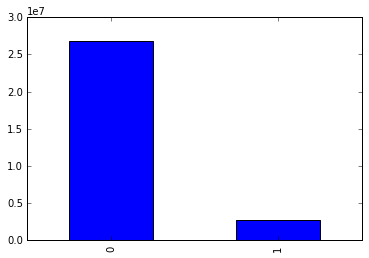

In [15]:
rec_log_df.claimed.value_counts().plot(kind='bar');

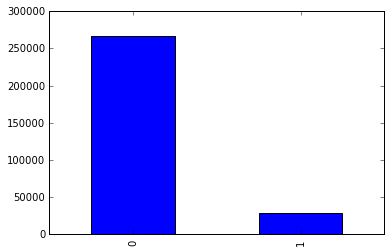

In [16]:
rec_log_subset.claimed.value_counts().plot(kind='bar');

In [17]:
labels = genres_df.genre.values

In [171]:
labels_short =['', 'Action', 'Arts',
       'Bios/Memoirs', 'Business', 'Children',
       'Graphic Novels', 'Contemp.',
       'Cooking', 'Crime', 'Education',
       'Erotica', 'Fantasy', 'Health', 'Hist. Romance', 'History',
       'Horror', 'Humor', 'LGBT', 'Mystery', 'Paranormal',
       'Romance', 'SciFi', 'Self-Help', 'Spiritual/Relig.',
       'Teen/Young Adult', 'Thriller', 'Travel', "Women's Fict.",
       'Other(Fict.)', 'Other(Nonfict.)', 'Hist. Fict.']

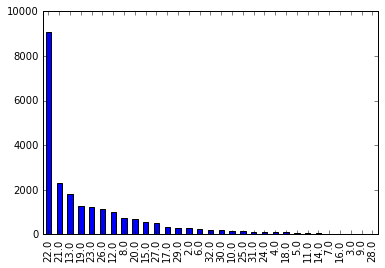

In [18]:
books_df.genre_id.value_counts().plot(kind='bar');
#plt.xticks(x, labels, rotation='vertical');

In [111]:
books_df.genre_id.value_counts().iloc[:10]

22.0    9066
21.0    2315
13.0    1809
19.0    1255
23.0    1247
26.0    1145
12.0    1027
8.0      725
20.0     698
15.0     571
Name: genre_id, dtype: int64

In [74]:
x = range(1,33)
for pair in zip(x,labels):
    print pair

(1, 'Select a genre')
(2, 'Action/Adventure')
(3, 'Arts & Photography')
(4, 'Biographies & Memoirs')
(5, 'Business')
(6, 'Children')
(7, 'Comics & Graphic Novels')
(8, 'Contemporary')
(9, 'Cookbooks, Food, & Wine')
(10, 'Crime')
(11, 'Education & Teaching')
(12, 'Erotica')
(13, 'Fantasy')
(14, 'Health')
(15, 'Historical Romance')
(16, 'History')
(17, 'Horror')
(18, 'Humor & Entertainment')
(19, 'LGBT')
(20, 'Mystery')
(21, 'Paranormal')
(22, 'Romance')
(23, 'Science Fiction')
(24, 'Self-Help')
(25, 'Spiritual/Religious')
(26, 'Teen & Young Adult')
(27, 'Thriller')
(28, 'Travel')
(29, "Women's Fiction")
(30, 'Other (Fiction)')
(31, 'Other (Nonfiction)')
(32, 'Historical Fiction')


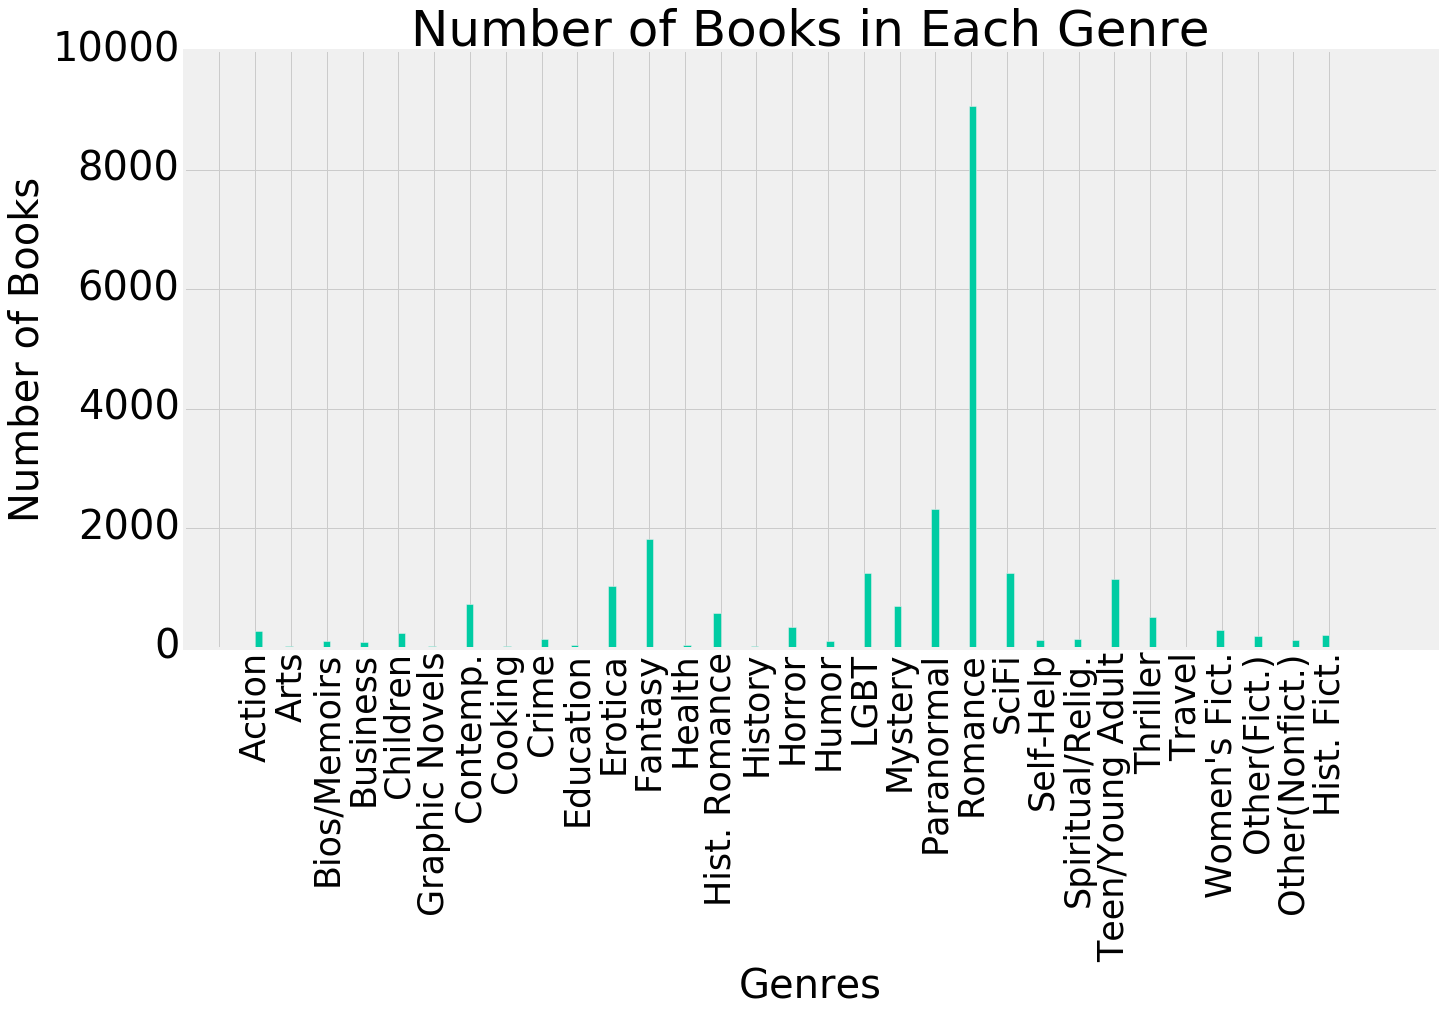

In [117]:
#plt.style.use('dark_background', 'fivethirtyeight');
with plt.style.context(('fivethirtyeight')):
    plt.rcParams['figure.facecolor'] = 'w'
    plt.figure(figsize=(20,10));   
    books_df.genre_id.hist(bins='auto', color="#00cca3");
    plt.xticks(x, labels_short, rotation=90, fontsize=35);
    plt.yticks(fontsize=40)
    plt.xlabel('Genres', fontsize=40)
    plt.ylabel('Number of Books', fontsize=40)
    plt.title('Number of Books in Each Genre', fontsize=50)

In [50]:
genres_df

,id,genre,created_at,updated_at
0,1,Select a genre,2016-12-10 17:10:34,2016-12-10 17:10:34
1,2,Action/Adventure,2016-12-10 17:10:34,2016-12-10 17:10:34
2,3,Arts & Photography,2016-12-10 17:10:34,2016-12-10 17:10:34
3,4,Biographies & Memoirs,2016-12-10 17:10:34,2016-12-10 17:10:34
4,5,Business,2016-12-10 17:10:34,2016-12-10 17:10:34
5,6,Children,2016-12-10 17:10:34,2016-12-10 17:10:34
6,7,Comics & Graphic Novels,2016-12-10 17:10:34,2016-12-10 17:10:34
7,8,Contemporary,2016-12-10 17:10:34,2016-12-10 17:10:34
8,9,"Cookbooks, Food, & Wine",2016-12-10 17:10:34,2016-12-10 17:10:34
9,10,Crime,2016-12-10 17:10:34,2016-12-10 17:10:34


In [79]:
labels

array(['Select a genre', 'Action/Adventure', 'Arts & Photography',
       'Biographies & Memoirs', 'Business', 'Children',
       'Comics & Graphic Novels', 'Contemporary',
       'Cookbooks, Food, & Wine', 'Crime', 'Education & Teaching',
       'Erotica', 'Fantasy', 'Health', 'Historical Romance', 'History',
       'Horror', 'Humor & Entertainment', 'LGBT', 'Mystery', 'Paranormal',
       'Romance', 'Science Fiction', 'Self-Help', 'Spiritual/Religious',
       'Teen & Young Adult', 'Thriller', 'Travel', "Women's Fiction",
       'Other (Fiction)', 'Other (Nonfiction)', 'Historical Fiction'], dtype=object)

In [43]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27063 entries, 0 to 27062
Data columns (total 22 columns):
id                   27063 non-null int64
title                27063 non-null object
description          10007 non-null object
preview              27063 non-null int64
asin                 4167 non-null object
genre_id             22989 non-null float64
genre_id_2           13871 non-null float64
genre_id_3           8477 non-null float64
user_id              27063 non-null int64
pen_name_id          27063 non-null int64
discover             27063 non-null int64
created_at           27063 non-null object
updated_at           27063 non-null object
deleted_at           4335 non-null object
drm                  27063 non-null int64
epub                 27063 non-null int64
mobi                 27063 non-null int64
pdf                  27063 non-null int64
epub_error           27063 non-null int64
epub_processing      27063 non-null int64
blog_featured        27063 non-null int64


In [120]:
books_recommended = rec_log_df.book_id.unique()

In [127]:
books_recommended_genres = []
for book in books_recommended:
    books_recommended_genres.append(books_df['genre_id'].loc[books_df.id == book].values[0])
books_recommended_genres_array = np.asarray(books_recommended_genres)

In [126]:
books_df['genre_id'].loc[books_df.id == books_recommended[0]].values[0]

22.0

In [135]:
np.isnan(books_recommended_genres_array).sum()

108

In [136]:
books_recommended_genres_no_nan = np.nan_to_num(books_recommended_genres_array)

In [137]:
np.isnan(books_recommended_genres_no_nan).sum()

0

In [142]:
np_hist = np.histogram(books_recommended_genres_no_nan)
np_hist

(array([ 270,  231,  303,  498, 1379,  642, 4469,  926,  944,  416]),
 array([  0. ,   3.2,   6.4,   9.6,  12.8,  16. ,  19.2,  22.4,  25.6,
         28.8,  32. ]))

In [147]:
len(books_recommended_genres_no_nan[books_recommended_genres_no_nan == 22.])

3222

In [149]:
np.unique(books_recommended_genres_no_nan)

array([  0.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.])

In [151]:
gen = []
gen_count = []
for value in np.unique(books_recommended_genres_no_nan):
    gen.append(value)
    gen_count.append(len(books_recommended_genres_no_nan[books_recommended_genres_no_nan == value]))

In [174]:
['None'] + labels_short

['None',
 '',
 'Action',
 'Arts',
 'Bios/Memoirs',
 'Business',
 'Children',
 'Graphic Novels',
 'Contemp.',
 'Cooking',
 'Crime',
 'Education',
 'Erotica',
 'Fantasy',
 'Health',
 'Hist. Romance',
 'History',
 'Horror',
 'Humor',
 'LGBT',
 'Mystery',
 'Paranormal',
 'Romance',
 'SciFi',
 'Self-Help',
 'Spiritual/Relig.',
 'Teen/Young Adult',
 'Thriller',
 'Travel',
 "Women's Fict.",
 'Other(Fict.)',
 'Other(Nonfict.)',
 'Hist. Fict.']

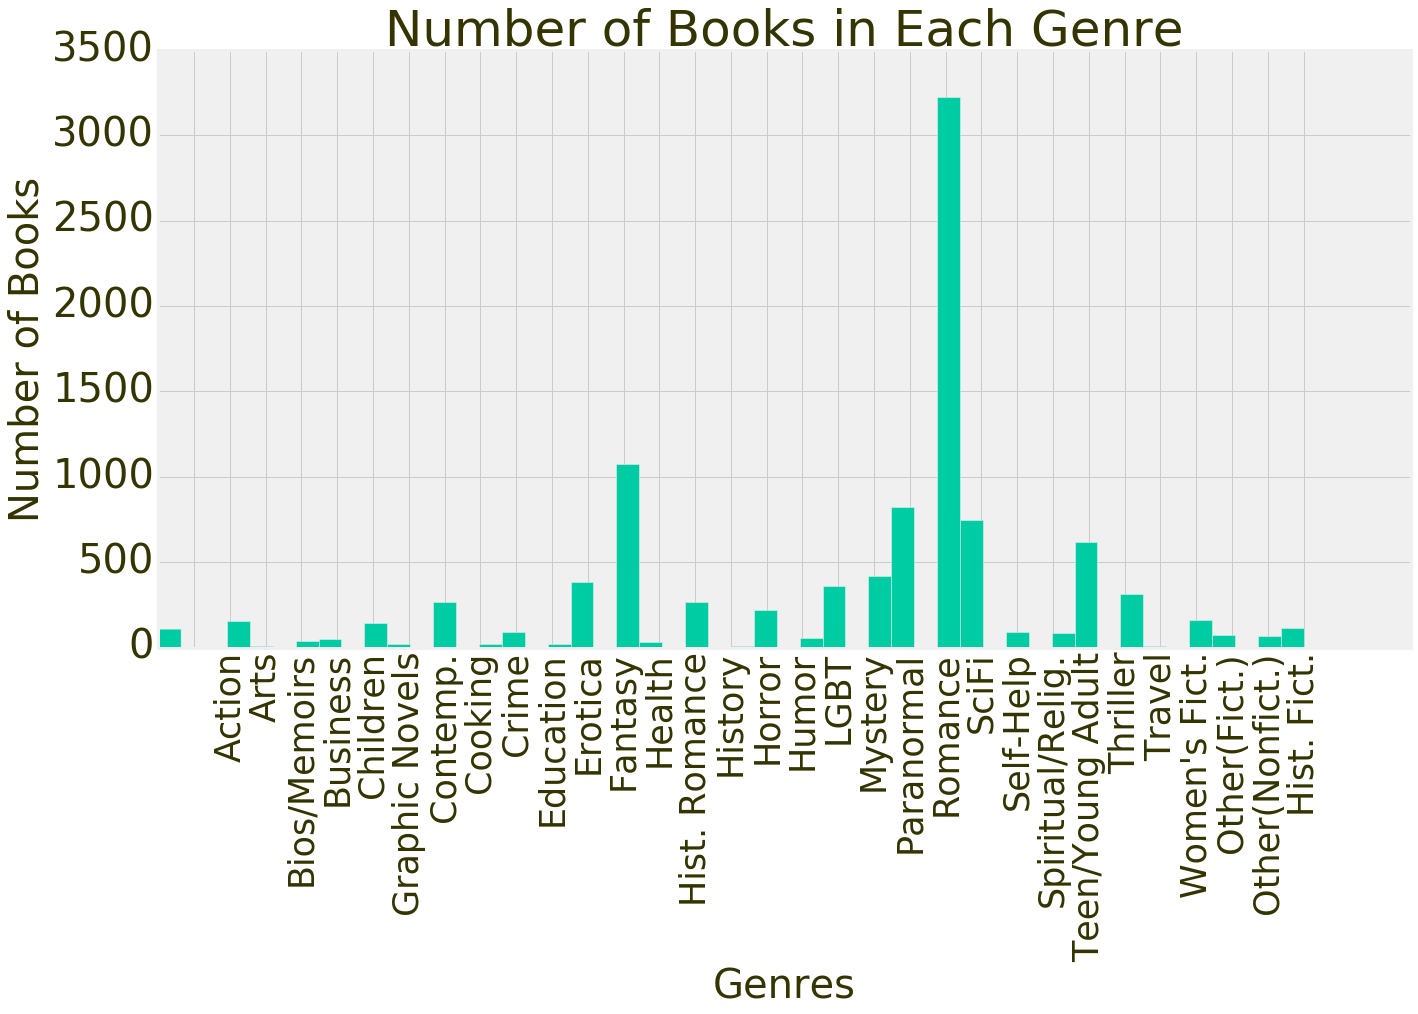

In [180]:
with plt.style.context(('fivethirtyeight')):
    plt.rcParams['figure.facecolor'] = 'w'
    plt.figure(figsize=(20,10));   
    #books_df.genre_id.hist(bins='auto', color="#00cca3");
    plt.hist(books_recommended_genres_no_nan, bins='auto', color="#00cca3");
    plt.xticks(x, labels_short, rotation=90, fontsize=35, color='#333300');
    plt.yticks(fontsize=40, color='#333300')
    plt.xlabel('Genres', fontsize=40, color='#333300')
    plt.ylabel('Number of Books', fontsize=40, color='#333300')
    plt.title('Number of Books in Each Genre', fontsize=50, color='#333300')



In [155]:
for pair in zip(gen, gen_count):
    print pair

(0.0, 108)
(2.0, 153)
(3.0, 9)
(4.0, 38)
(5.0, 48)
(6.0, 145)
(7.0, 19)
(8.0, 265)
(9.0, 19)
(10.0, 91)
(11.0, 21)
(12.0, 386)
(13.0, 1076)
(14.0, 34)
(15.0, 269)
(16.0, 7)
(17.0, 219)
(18.0, 58)
(19.0, 358)
(20.0, 422)
(21.0, 825)
(22.0, 3222)
(23.0, 749)
(24.0, 91)
(25.0, 86)
(26.0, 617)
(27.0, 315)
(28.0, 12)
(29.0, 159)
(30.0, 76)
(31.0, 65)
(32.0, 116)
